# Roll Number: 22CS60R70
# Name: Yashkumar Paneliya
# Project Code: APHC-DS
# Project Title: Airline Passenger Segmentation using Single Linkage Divisive (Top-Down) Clustering Technique

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import dot
from numpy.linalg import norm

from sklearn.metrics import silhouette_score, silhouette_samples

# Data Loading and Basic Analysis

In [2]:
df = pd.read_csv('airpass.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,3,5,5,5,5,2,5,5,50,44.0
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,5,4,4,4,4,3,4,5,0,0.0
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,2,4,1,3,2,2,2,0,0.0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,2,4,2,4,0,20.0


In [3]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2991.000000
mean,1499.500000,64868.466667,39.829667,1223.579000,2.753667,3.051000,2.752667,2.975333,3.261667,3.252000,3.470000,3.405667,3.37900,3.375000,3.622667,3.289000,3.686667,3.314000,15.230000,15.474423
std,866.169729,37759.919439,15.227780,1000.372981,1.320695,1.505043,1.385448,1.281902,1.325059,1.346266,1.327034,1.305758,1.27537,1.310323,1.160776,1.281936,1.144957,1.314019,40.285689,39.799463
min,0.000000,79.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,749.750000,31700.250000,27.000000,426.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,1499.500000,64757.000000,40.000000,882.500000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,2249.250000,97854.000000,51.000000,1806.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.00000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,2999.000000,129876.000000,80.000000,4817.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,951.000000,940.000000


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3000 non-null   int64  
 1   id                                 3000 non-null   int64  
 2   Gender                             3000 non-null   object 
 3   Customer Type                      3000 non-null   object 
 4   Age                                3000 non-null   int64  
 5   Type of Travel                     3000 non-null   object 
 6   Class                              3000 non-null   object 
 7   Flight Distance                    3000 non-null   int64  
 8   Inflight wifi service              3000 non-null   int64  
 9   Departure/Arrival time convenient  3000 non-null   int64  
 10  Ease of Online booking             3000 non-null   int64  
 11  Gate location                      3000 non-null   int64

In [6]:
df.shape

(3000, 24)

In [7]:
# Calculating NULL percentage in each feature
((df.isnull().sum() / len(df))*100).sort_values(ascending=False).to_frame()
# This shows that there are no null values in the dataset for any feature

,0
Arrival Delay in Minutes,0.3
id,0.0
Departure Delay in Minutes,0.0
Cleanliness,0.0
Inflight service,0.0
Checkin service,0.0
Baggage handling,0.0
Leg room service,0.0
On-board service,0.0
Inflight entertainment,0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\1735987642.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

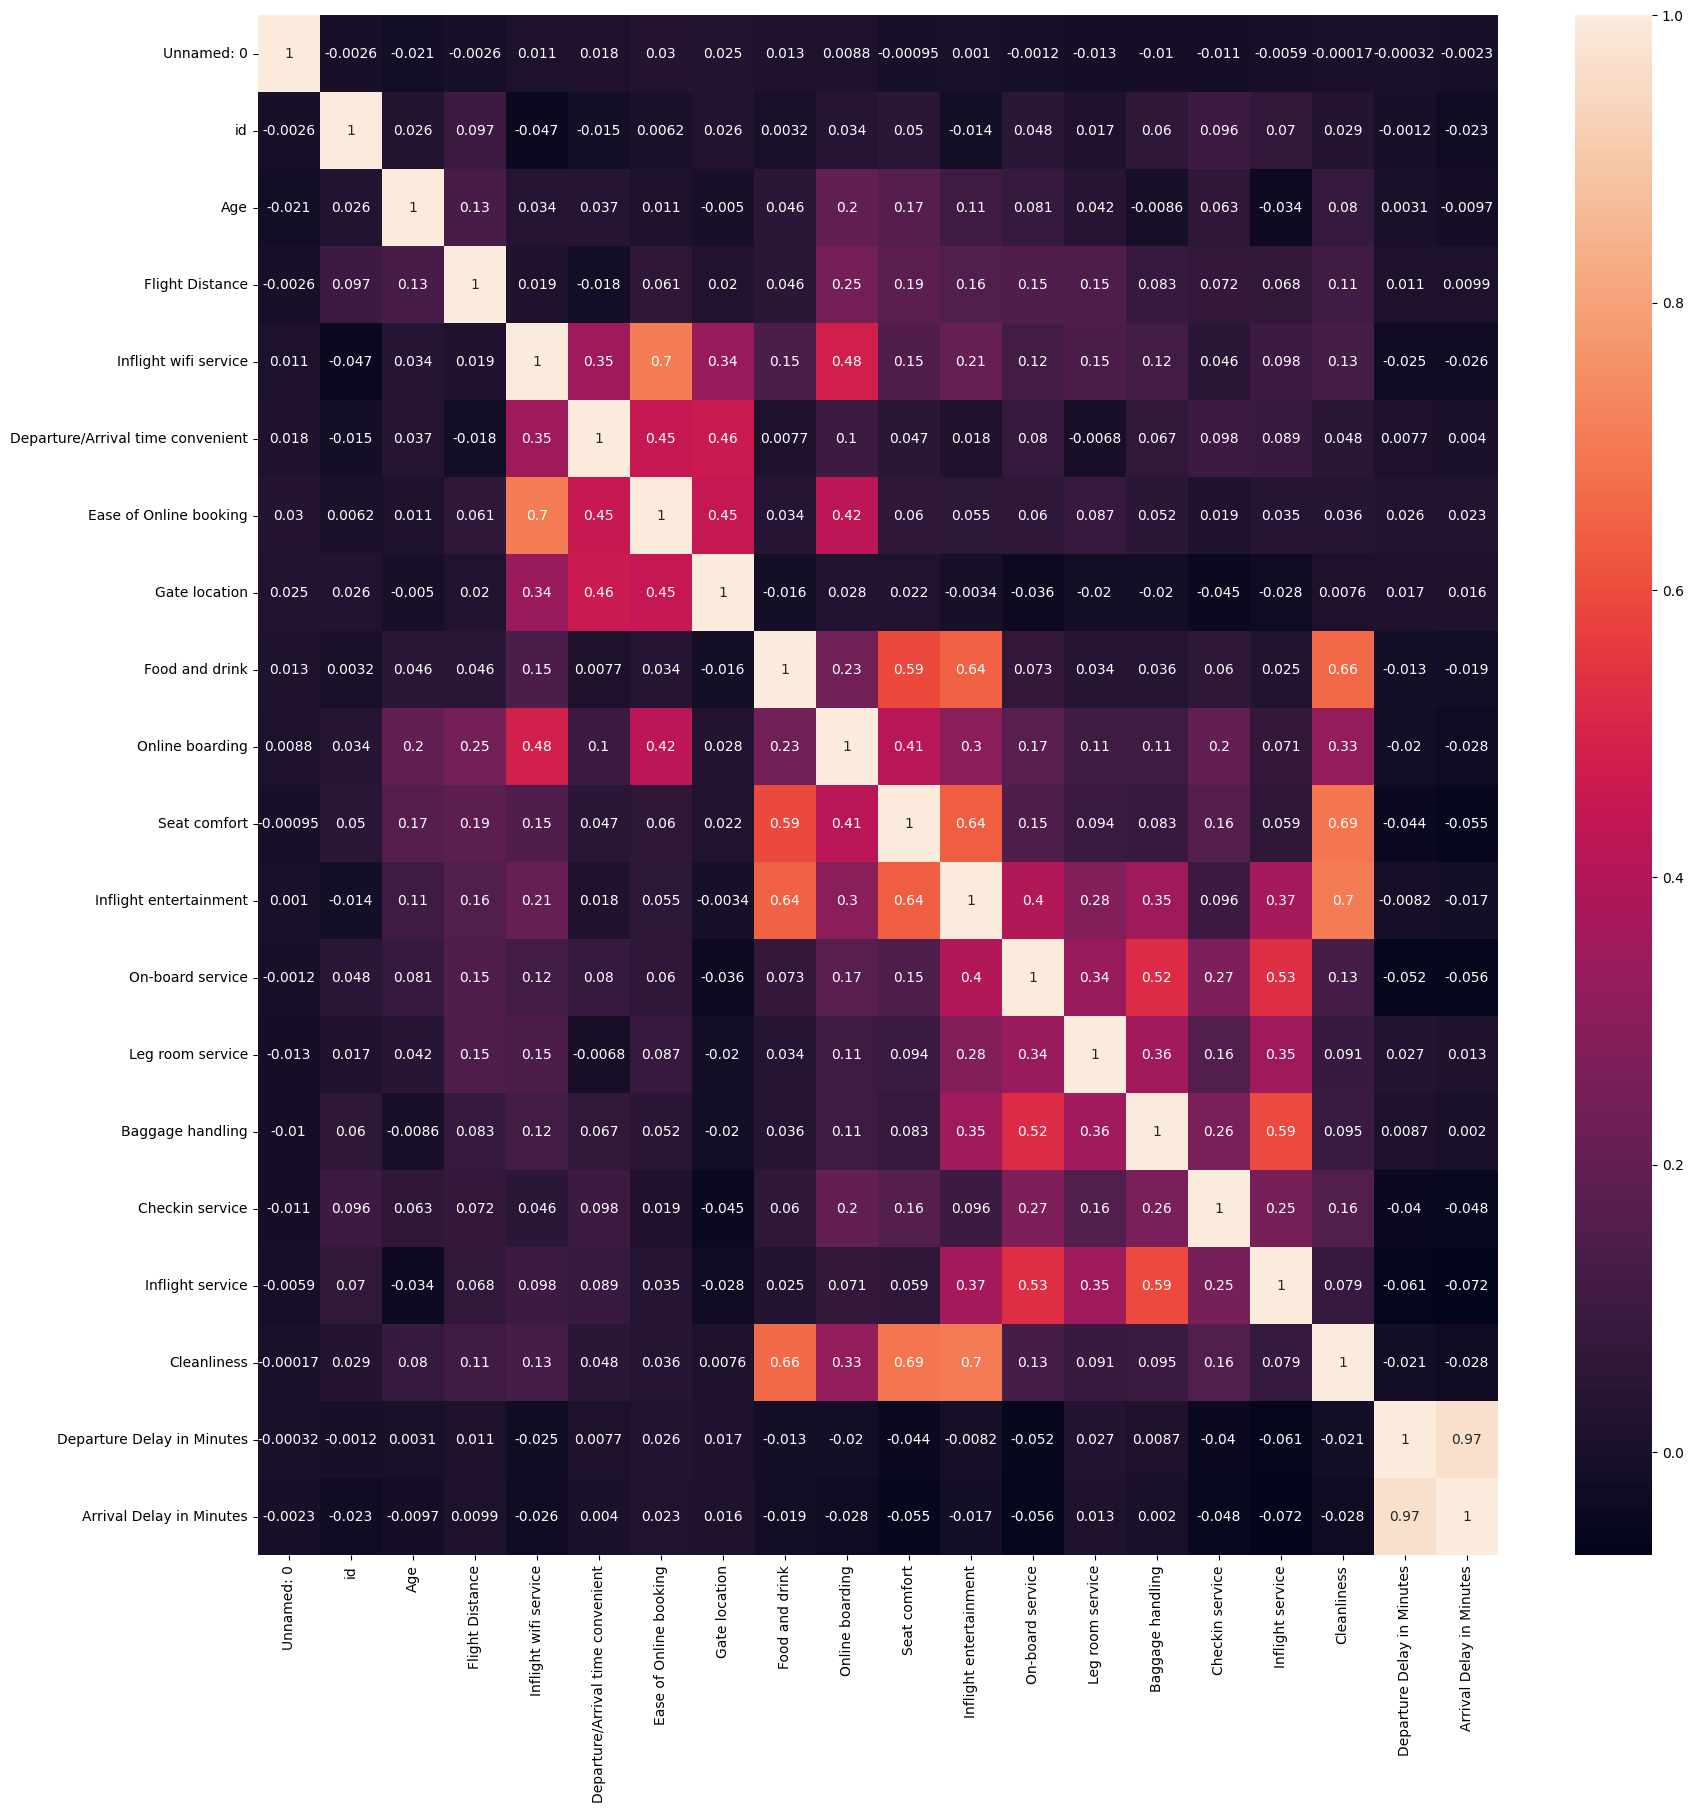

In [8]:
# Plotting heatmap to see correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

## Data filtering

In [9]:
df['Type of Travel'].value_counts()

Business travel    2104
Personal Travel     896
Name: Type of Travel, dtype: int64

In [10]:
df['Class'].value_counts()

Business    1451
Eco         1326
Eco Plus     223
Name: Class, dtype: int64

In [11]:
df['Customer Type'].value_counts()

Loyal Customer       2445
disloyal Customer     555
Name: Customer Type, dtype: int64

In [12]:
# replacing object type with int for better distance calculation
# Gender
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [0,1])

# Type of Travel
df['Type of Travel'] = df['Type of Travel'].replace(['Business travel', 'Personal Travel'],[0,1])

# Class
df['Class'] = df['Class'].replace(['Business','Eco', 'Eco Plus'],[0,1,2])

# Customer type
df['Customer Type'] = df['Customer Type'].replace(['Loyal Customer', 'disloyal Customer'], [0,1])
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,19556,1,0,52,0,1,160,5,4,...,3,5,5,5,5,2,5,5,50,44.0
1,1,90035,1,0,36,0,0,2863,1,1,...,5,4,4,4,4,3,4,5,0,0.0
2,2,12360,0,1,20,0,1,192,2,0,...,2,2,4,1,3,2,2,2,0,0.0
3,3,77959,0,0,44,0,0,3377,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,4,36875,1,0,49,0,1,1182,2,3,...,2,2,2,2,2,4,2,4,0,20.0


In [13]:
avg_A = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(avg_A)

In [14]:
# Calculating NULL percentage in each feature
((df.isnull().sum() / len(df))*100).sort_values(ascending=False).to_frame()
# This shows that there are no null values in the dataset for any feature

,0
Unnamed: 0,0.0
id,0.0
Departure Delay in Minutes,0.0
Cleanliness,0.0
Inflight service,0.0
Checkin service,0.0
Baggage handling,0.0
Leg room service,0.0
On-board service,0.0
Inflight entertainment,0.0


In [15]:
df.drop('id', inplace=True, axis=1)
df.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,0,52,0,1,160,5,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,1,1,0,36,0,0,2863,1,1,3,...,5,4,4,4,4,3,4,5,0,0.0
2,2,0,1,20,0,1,192,2,0,2,...,2,2,4,1,3,2,2,2,0,0.0
3,3,0,0,44,0,0,3377,0,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,4,1,0,49,0,1,1182,2,3,4,...,2,2,2,2,2,4,2,4,0,20.0


In [16]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,52,0,1,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,1,0,36,0,0,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,0,1,20,0,1,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,0,0,44,0,0,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,1,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   int64  
 1   Customer Type                      3000 non-null   int64  
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   int64  
 4   Class                              3000 non-null   int64  
 5   Flight Distance                    3000 non-null   int64  
 6   Inflight wifi service              3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Ease of Online booking             3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Food and drink                     3000 non-null   int64  
 11  Online boarding                    3000 non-null   int64

# K-means clustering

- k-means clustering divides data into a predefined number of clusters, hierarchical clustering creates a hierarchical tree-like structure to represent the relationships between the clusters.

In [18]:
df.values

array([[ 1.,  0., 52., ...,  5., 50., 44.],
       [ 1.,  0., 36., ...,  5.,  0.,  0.],
       [ 0.,  1., 20., ...,  2.,  0.,  0.],
       ...,
       [ 1.,  0., 25., ...,  3.,  0.,  0.],
       [ 0.,  0., 16., ...,  1.,  4.,  0.],
       [ 0.,  0., 50., ...,  3.,  0.,  0.]])

In [60]:
# normalizing dataset so that we can directly use cosine similarity
norms = np.linalg.norm(df.values, axis=1)
X_norm = (df.values) / norms[:, np.newaxis]

# normalize the dataset
# normalized_df = ( df - df.mean() ) / df.std()
# np_norm_df = normalized_df.to_numpy()
X_norm[0:2]

array([[5.50506906e-03, 0.00000000e+00, 2.86263591e-01, 0.00000000e+00,
        5.50506906e-03, 8.80811050e-01, 2.75253453e-02, 2.20202762e-02,
        1.65152072e-02, 2.20202762e-02, 1.65152072e-02, 2.20202762e-02,
        1.65152072e-02, 2.75253453e-02, 2.75253453e-02, 2.75253453e-02,
        2.75253453e-02, 1.10101381e-02, 2.75253453e-02, 2.75253453e-02,
        2.75253453e-01, 2.42223039e-01, 5.50506906e-03],
       [3.49252162e-04, 0.00000000e+00, 1.25730778e-02, 0.00000000e+00,
        0.00000000e+00, 9.99908940e-01, 3.49252162e-04, 3.49252162e-04,
        1.04775649e-03, 3.49252162e-04, 1.74626081e-03, 1.39700865e-03,
        1.74626081e-03, 1.39700865e-03, 1.39700865e-03, 1.39700865e-03,
        1.39700865e-03, 1.04775649e-03, 1.39700865e-03, 1.74626081e-03,
        0.00000000e+00, 0.00000000e+00, 6.98504324e-04]])

In [20]:
# cosine similarity calculator
def cosine_similarity(a,b):
  # performing just dot product, because a and b are already normalized during data preprocessing
  return np.dot(a, b)

In [21]:
import random

class CustomKMeans:
  def __init__(self, k, max_iteration):
    self.K = k
    self.epochs = max_iteration
  
  def fit(self, X):
    # initialize K centroid randomly
    centroid_indices = np.random.choice(X.shape[0], size=self.K, replace=False)
    self.centroids = X[centroid_indices]
    print("Initial centroids: ", self.centroids)

    # create empty list to store cluster index of each member
    cluster_indexes = []

    # iterate to compute accurate centroids
    for epoch in range(self.epochs):
      # initialize each data point with cluster id 0
      cluster_indexes = [ 0 for i in range(X.shape[0]) ]

      s=set() # JUST FOR DEBUGGING
      # calculate distance from each point to all centroids
      for i, x in enumerate(X):
          # calculating cosine distance using normalized centroid and normalized data point
          distances = [cosine_similarity(x, c) for c in self.centroids]
          # taking out closest cluster index
          cluster_indexes[i] = np.argmax(distances)
          s.add(np.argmax(distances))

      # update centroids
      for center_i in range(self.K):
        # extracting indice of data points with same cluster index
        indices = [i for i, c in enumerate(cluster_indexes) if c == center_i]
        if len(indices) > 0:
          # taking mean of data points of a cluster to form new centroid
          self.centroids[center_i] = np.mean(X[indices], axis=0)
    return self.centroids

  def save_final_clusters(self,X):
    # find distance and cluster index for each point
    self.cluster_indexes = [ 0 for i in range(X.shape[0]) ]
    for i, x in enumerate(X):
        distances = [cosine_similarity(x, c) for c in self.centroids]
        self.cluster_indexes[i] = np.argmax(distances)

    # list of datapoints according to their cluster index
    self.point_list = [[] for _ in range(self.K)]

    # get indices of data points for each cluster
    for center_i in range(self.K):
      indices = [i for i, c in enumerate(self.cluster_indexes) if c == center_i]
      self.point_list[center_i] = indices

    # saving the resultant cluster indices in file
    self.point_list = sorted(self.point_list, key=len)
    with open("KMeans.txt", 'w') as f:
      for i, l in  enumerate(self.point_list):
        print("Points in cluster ", i, " : ", len(l))
        f.write(','.join(map(str, l)))
        f.write('\n')
    return self.cluster_indexes

  # def silhouette_coefficient(self, X):
  #   silhouette_values = np.zeros(len(X))

  #   for i in range(len(X)):
  #     # get cluster label of data point
  #     cluster_index = self.cluster_indexes[i]
  #     # get all data point indices of members in same cluster
  #     cluster_indices = self.point_list[cluster_index]
  #     # remove current datapoint from list of indices
  #     cluster_indices = np.delete(cluster_indices, np.where(cluster_indices == i))
  #     # calculate distance between current point and all other points
  #     cluster_distances = np.array([np.dot(X[i], X[j]) for j in cluster_indices])
  #     # calculate mean of distances
  #     cluster_mean_distance = np.mean(cluster_distances) if len(cluster_distances) > 0 else 0

      # # find distance with members of neighbour cluster
      # neighbour_cluster_indices = []
      # for j in range(self.K):
      #   if j != cluster_index:
      #     neighbour_cluster_indices += self.point_list[j]
      
      # # neighbour_cluster_distances = np.array([np.dot(X[i], self.centroids[j]) for j in range(self.K) if j in self.cluster_indexes[neighbour_cluster_indices]])
      # neighbour_cluster_distances = []
      # for j in neighbour_cluster_indices:
      #     neighbour_cluster_distances.append(np.dot(X[i], X[j]))
      # neighbour_cluster_mean_distance = np.mean(neighbour_cluster_distances) if len(neighbour_cluster_distances) > 0 else 0

  #     if cluster_mean_distance == 0 and neighbour_cluster_mean_distance == 0:
  #           silhouette_values[i] = 0
  #     else:
  #           silhouette_values[i] = (neighbour_cluster_mean_distance - cluster_mean_distance) / max(cluster_mean_distance, neighbour_cluster_mean_distance)
  #   print("Silhoutte Co-eff: ", np.mean(silhouette_values))

In [22]:
K = 3
kmeans = CustomKMeans(K, 20)
centroids = kmeans.fit(X_norm)
print("Final centroids: ", centroids)
labels = kmeans.save_final_clusters(X_norm)

Initial centroids:  [[0.         0.         0.05723897 0.00114478 0.00114478 0.99824761
  0.00343434 0.00343434 0.00343434 0.00457912 0.00343434 0.00343434
  0.00343434 0.00343434 0.00457912 0.0057239  0.00457912 0.00343434
  0.00457912 0.00343434 0.         0.        ]
 [0.         0.         0.02832391 0.         0.         0.99951933
  0.00125884 0.0031471  0.0031471  0.0031471  0.00125884 0.00251768
  0.00188826 0.00125884 0.00125884 0.00125884 0.00125884 0.00125884
  0.00125884 0.00188826 0.01007072 0.00125884]
 [0.00129241 0.00129241 0.03747975 0.         0.00129241 0.99902908
  0.00258481 0.00258481 0.00258481 0.00387722 0.00516962 0.00258481
  0.00516962 0.00516962 0.00129241 0.00387722 0.00387722 0.00387722
  0.00516962 0.00516962 0.00516962 0.01680127]]
Final centroids:  [[2.95967728e-03 1.06768860e-03 3.05306967e-01 2.34047394e-03
  5.37747999e-03 9.38716613e-01 1.78972333e-02 1.79645920e-02
  1.60896595e-02 1.75507660e-02 2.04591461e-02 1.91764923e-02
  2.05957967e-02 2.118

In [23]:
np.unique(labels)

array([0, 1, 2], dtype=int64)

In [24]:
silhouette_avg = silhouette_score(X_norm, labels, metric='cosine')
print("Silhouette Score for k=3 : ",silhouette_avg)

Silhouette Score for k=3 :  0.8586594889992042


# Silhouette Coefficient


In [25]:
# Repeating for k=4,5,6
sill_score = []
for k in [3,4,5,6]:
  kmeans = CustomKMeans(k, 20)
  centroids = kmeans.fit(X_norm)
  print("Final centroids: ", centroids)
  labels = kmeans.save_final_clusters(X_norm)
  silhouette_avg = silhouette_score(X_norm, labels, metric='cosine')
  print("Silhouette Score for k=",k," : ",silhouette_avg)
  sill_score.append(silhouette_avg)

Initial centroids:  [[1.84929151e-03 0.00000000e+00 8.13688263e-02 0.00000000e+00
  1.84929151e-03 9.85672373e-01 3.69858301e-03 1.84929151e-03
  5.54787452e-03 5.54787452e-03 9.24645753e-03 7.39716602e-03
  5.54787452e-03 3.69858301e-03 3.69858301e-03 3.69858301e-03
  3.69858301e-03 3.69858301e-03 3.69858301e-03 3.69858301e-03
  1.07258907e-01 9.98617413e-02]
 [3.06792550e-04 0.00000000e+00 1.74871754e-02 0.00000000e+00
  0.00000000e+00 9.99836921e-01 6.13585100e-04 1.53396275e-03
  6.13585100e-04 6.13585100e-04 1.22717020e-03 1.53396275e-03
  1.22717020e-03 1.22717020e-03 1.22717020e-03 1.22717020e-03
  1.53396275e-03 1.22717020e-03 1.22717020e-03 1.22717020e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.28375566e-04 2.43052760e-02 0.00000000e+00
  5.28375566e-04 9.99686571e-01 1.58512670e-03 1.58512670e-03
  1.58512670e-03 1.58512670e-03 1.05675113e-03 1.58512670e-03
  1.05675113e-03 1.05675113e-03 1.58512670e-03 2.11350226e-03
  2.11350226e-03 2.11350226e-03 1.58512670e-03

<AxesSubplot: >

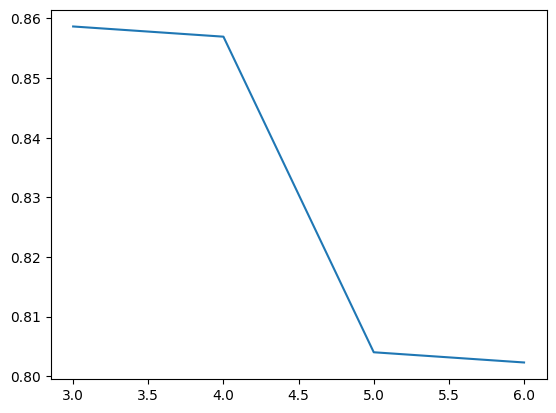

In [26]:
# plotting silhouette scores against K
sns.lineplot(x=[3,4,5,6], y=sill_score)

**As we can see here, for k=3 and 4 we are getting almost same and highest sillhouette scores. We take k=3 as the best value of K here. So, the result for k=3 will be stored for future references**

In [61]:
K = 3
kmeans = CustomKMeans(K, 20)
centroids = kmeans.fit(X_norm)
print("Final centroids: ", centroids)
labels = kmeans.save_final_clusters(X_norm)

Initial centroids:  [[0.00232211 0.00232211 0.15093725 0.         0.         0.98689739
  0.00928845 0.00928845 0.00928845 0.01161056 0.00928845 0.00928845
  0.00928845 0.00928845 0.00696633 0.00464422 0.00928845 0.01161056
  0.01161056 0.00928845 0.04412012 0.00464422 0.00464422]
 [0.         0.         0.04131484 0.         0.         0.99760226
  0.00403072 0.00403072 0.00403072 0.00403072 0.00403072 0.00403072
  0.0050384  0.00403072 0.00403072 0.00403072 0.00403072 0.00302304
  0.00403072 0.00302304 0.03728413 0.0382918  0.00201536]
 [0.00598138 0.         0.18542275 0.         0.00598138 0.98094616
  0.01196276 0.01794414 0.01794414 0.01794414 0.01196276 0.01196276
  0.01196276 0.01196276 0.01794414 0.01794414 0.01794414 0.00598138
  0.01794414 0.01196276 0.         0.         0.01196276]]
Final centroids:  [[1.58461020e-03 6.30946996e-04 1.26053771e-01 1.29050224e-03
  2.75193102e-03 8.55398495e-01 9.43854334e-03 1.05466602e-02
  9.00190090e-03 1.05331944e-02 9.98723484e-03 9.12

In [62]:
df['labels'] = labels
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,labels
0,1,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,0
1,1,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,1
3,0,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


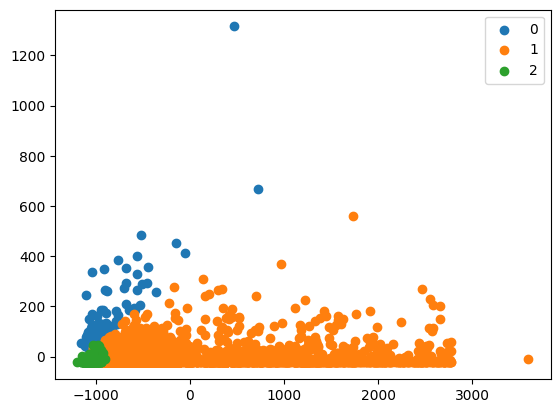

In [63]:
from sklearn.decomposition import PCA

# Doing PCA for cluster plotting
pca = PCA(2)

# Transform the data
pdf = pca.fit_transform(df)

# Getting unique labels
u_labels = np.unique(labels)
 
# plotting the results:
for i in u_labels:
    plt.scatter(pdf[labels == i , 0] , pdf[labels == i , 1] , label = i)
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


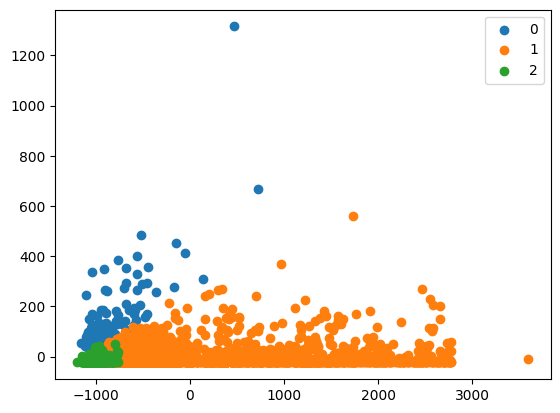

In [64]:
from sklearn.cluster import KMeans as SklearnKMeans
 
#Load Data
data = df
pca = PCA(2)
 
#Transform the data
pdf = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = SklearnKMeans(n_clusters= 3, max_iter=20)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X_norm)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(pdf[label == i , 0] , pdf[label == i , 1] , label = i)
plt.legend()
plt.show()

# Single Linkage Divisive Clustering

In [31]:
newdf = pd.read_csv('airpass.csv')
newdf.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,3,5,5,5,5,2,5,5,50,44.0
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,5,4,4,4,4,3,4,5,0,0.0
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,2,4,1,3,2,2,2,0,0.0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,2,4,2,4,0,20.0


In [32]:
# replacing object type with int for better distance calculation
# Gender
newdf['Gender'] = newdf['Gender'].replace(['Male', 'Female'], [0,1])

# Type of Travel
newdf['Type of Travel'] = newdf['Type of Travel'].replace(['Business travel', 'Personal Travel'],[0,1])

# Class
newdf['Class'] = newdf['Class'].replace(['Business','Eco', 'Eco Plus'],[0,1,2])

# Customer type
newdf['Customer Type'] = newdf['Customer Type'].replace(['Loyal Customer', 'disloyal Customer'], [0,1])
newdf.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,19556,1,0,52,0,1,160,5,4,...,3,5,5,5,5,2,5,5,50,44.0
1,1,90035,1,0,36,0,0,2863,1,1,...,5,4,4,4,4,3,4,5,0,0.0
2,2,12360,0,1,20,0,1,192,2,0,...,2,2,4,1,3,2,2,2,0,0.0
3,3,77959,0,0,44,0,0,3377,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,4,36875,1,0,49,0,1,1182,2,3,...,2,2,2,2,2,4,2,4,0,20.0


In [33]:
avg_A = newdf['Arrival Delay in Minutes'].mean()
newdf['Arrival Delay in Minutes'] = newdf['Arrival Delay in Minutes'].fillna(avg_A)

In [34]:
newdf.drop('id', inplace=True, axis=1)
newdf.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,0,52,0,1,160,5,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,1,1,0,36,0,0,2863,1,1,3,...,5,4,4,4,4,3,4,5,0,0.0
2,2,0,1,20,0,1,192,2,0,2,...,2,2,4,1,3,2,2,2,0,0.0
3,3,0,0,44,0,0,3377,0,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,4,1,0,49,0,1,1182,2,3,4,...,2,2,2,2,2,4,2,4,0,20.0


In [35]:
newdf.drop('Unnamed: 0', inplace=True, axis=1)
newdf.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,52,0,1,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,1,0,36,0,0,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,0,1,20,0,1,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,0,0,44,0,0,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,1,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0


In [36]:
# normalizing dataset so that we can directly use cosine similarity
new_norms = np.linalg.norm(newdf.values, axis=1)
new_X_norm = (newdf.values) / new_norms[:, np.newaxis]

new_X_norm[0:2]

array([[5.50515248e-03, 0.00000000e+00, 2.86267929e-01, 0.00000000e+00,
        5.50515248e-03, 8.80824397e-01, 2.75257624e-02, 2.20206099e-02,
        1.65154574e-02, 2.20206099e-02, 1.65154574e-02, 2.20206099e-02,
        1.65154574e-02, 2.75257624e-02, 2.75257624e-02, 2.75257624e-02,
        2.75257624e-02, 1.10103050e-02, 2.75257624e-02, 2.75257624e-02,
        2.75257624e-01, 2.42226709e-01],
       [3.49252247e-04, 0.00000000e+00, 1.25730809e-02, 0.00000000e+00,
        0.00000000e+00, 9.99909184e-01, 3.49252247e-04, 3.49252247e-04,
        1.04775674e-03, 3.49252247e-04, 1.74626124e-03, 1.39700899e-03,
        1.74626124e-03, 1.39700899e-03, 1.39700899e-03, 1.39700899e-03,
        1.39700899e-03, 1.04775674e-03, 1.39700899e-03, 1.74626124e-03,
        0.00000000e+00, 0.00000000e+00]])

In [37]:
def cosine_similarity(a,b):
  return np.dot(a,b)

In [38]:
def prim_mst(adj_matrix):
    n = len(adj_matrix)
    mst = np.zeros((n, n))
    mst.fill(10000)

    # initialize the visited and unvisited sets
    visited = set([0])
    unvisited = set(range(1, n))

    while unvisited:
        # find the minimum edge weight between a visited and an unvisited node
        min_weight = float('inf')
        min_edge = None
        for i in visited:
            for j in unvisited:
                if adj_matrix[i, j] < min_weight:
                    min_weight = adj_matrix[i, j]
                    min_edge = (i, j)

        # add the minimum edge to the MST
        i, j = min_edge
        mst[i, j] = min_weight
        mst[j, i] = min_weight

        # mark j as visited and remove it from unvisited
        visited.add(j)
        unvisited.remove(j)


    return mst


In [39]:
class SingleLinkageDivisiveCLustering():
  def __init__(self, k):
    self.k = k
  
  def dfs(self, start):
    '''
    DFS to find connected data points in a cluster
    '''
    n = len(self.mst)
    visited = [False] * n
    dfs_order = []
    # dfs recursive helper
    def dfs_helper(node):
        visited[node] = True
        dfs_order.append(node)
        for neighbor in range(n):
            if self.mst[node, neighbor] != 10000 and self.mst[node, neighbor] >= 0 and not visited[neighbor]:
                dfs_helper(neighbor)

    dfs_helper(start)
    return dfs_order
  
  def generate_proximity(self, X):
    '''
    compute proximity matrix using cosine similarity
    '''
    n = X.shape[0]
    # Initialize the proximity matrix with zeros
    prox_mat = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            prox_mat[i, j] = cosine_similarity(X[i], X[j])
            prox_mat[j, i] = prox_mat[i, j]
    return prox_mat

  def remove_min_edge(self):
      '''
      remove minimum edge (least similarity) from MST
      '''
      n = len(self.mst)
      min_weight = float('inf')
      min_i = None
      min_j = None

      # iterate over the upper triangular part of the matrix to find the minimum weight edge
      for i in range(n):
          for j in range(i + 1, n):
              if self.mst[i, j] < min_weight:
                  min_weight = self.mst[i, j]
                  min_i = i
                  min_j = j

      # remove the minimum weight edge from the MST
      self.mst[min_i, min_j] = 10000
      self.mst[min_j, min_i] = 10000

      return (min_i, min_j)

  def generate_mst(self, prox_mat):
    self.mst = prim_mst(prox_mat)

  def fit(self, X):
    # all points in one cluster
    self.clusters = [[] for i in range(self.k)]

    prox_mat = self.generate_proximity(X)
    # computer MST
    self.generate_mst(prox_mat)
    i = 1
    cutset = set()
    # keep removing minimum edges till k clusters are formed
    while i < self.k:
      cuti, cutj = self.remove_min_edge()
      cutset.add(cuti)
      cutset.add(cutj)
      i = i+1
    index = 0
    print("Cutset: ",cutset)
    # add points to corresponding cluster
    for index, node in enumerate(cutset):
      self.clusters[index] = self.dfs(node)

    return self.clusters

In [40]:
sldc = SingleLinkageDivisiveCLustering(3)

In [41]:
clusters = sldc.fit(new_X_norm)

Cutset:  {1600, 2593, 977}


In [42]:
with open('divisive_cluster.txt','w') as f:
  for i,c in enumerate(clusters):
    f.write(','.join(map(str, c)))
    f.write('\n')

In [65]:
def read_clusters_file(filename):
    clusters = []
    with open(filename, 'r') as f:
        for line in f:
            cluster = [int(x) for x in line.strip().split(',')]
            clusters.append(set(cluster))
    return clusters

def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

# read the two cluster files
clusters1 = read_clusters_file('KMeans.txt')
clusters2 = read_clusters_file('divisive_cluster.txt')

In [ ]:
clusters1

In [66]:
# compute the Jaccard similarity between each pair of clusters
jaccard_scores = []
for i in range(len(clusters1)):
  for j in range(len(clusters2)):
    score = jaccard_similarity(clusters1[i], clusters2[j])
    print("Jaccard similarity between cluster ",i, "of KMeans and cluster ",j,"th of SLDC: ", score)
    jaccard_scores.append(score)

# compute the average Jaccard similarity
average_score = sum(jaccard_scores) / len(jaccard_scores)

print('Average Jaccard similarity:', average_score)

Jaccard similarity between cluster  0 of KMeans and cluster  0 th of SLDC:  0.011904761904761904
Jaccard similarity between cluster  0 of KMeans and cluster  1 th of SLDC:  0.1314935064935065
Jaccard similarity between cluster  0 of KMeans and cluster  2 th of SLDC:  0.0008103727714748784
Jaccard similarity between cluster  1 of KMeans and cluster  0 th of SLDC:  0.0
Jaccard similarity between cluster  1 of KMeans and cluster  1 th of SLDC:  0.0076726342710997444
Jaccard similarity between cluster  1 of KMeans and cluster  2 th of SLDC:  0.07065217391304347
Jaccard similarity between cluster  2 of KMeans and cluster  0 th of SLDC:  0.0
Jaccard similarity between cluster  2 of KMeans and cluster  1 th of SLDC:  0.185997171145686
Jaccard similarity between cluster  2 of KMeans and cluster  2 th of SLDC:  0.7606456043956044
Average Jaccard similarity: 0.12990846943279744
